This EDA looks at crime incident reports in the city of Boston from June 2015 to September 2018. I use Folium for plotting an interactive heatmap of Boston, and seaborn for everything else.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [38]:
df= pd.read_csv('crime.csv', encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


Let's focus on 2016 and 2017, the two years with complete data. And filter out UCR Part Two and Part Three

In [39]:
df2 = df.loc[df['YEAR'].isin([2016, 2017])]
df2 = df2.loc[df2['UCR_PART']=='Part One']

In [40]:
# Convert OCCURED_ON_DATE to datetime
df2['OCCURRED_ON_DATE'] = pd.to_datetime(df2['OCCURRED_ON_DATE'])

In [41]:
df2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,I182064766,617,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2017-10-23 13:58:00,2017,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,I182064449,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2017-03-22 09:00:00,2017,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,I182063310,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2017-03-23 12:00:00,2017,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,I182057388,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2017-11-21 21:00:00,2017,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,I182055406,617,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2017-12-15 16:06:00,2017,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


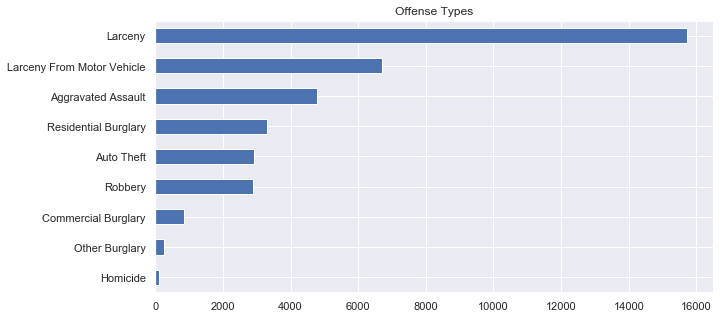

In [42]:
sns.set()
df2['OFFENSE_CODE_GROUP'].value_counts(ascending=True).to_frame().plot(kind='barh', figsize=(10,5), 
                                                                       legend=False, title='Offense Types')

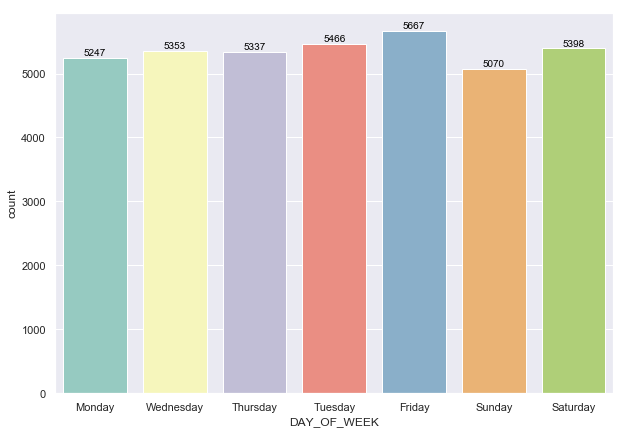

In [43]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df2['DAY_OF_WEEK'], palette='Set3',)
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')

We can see there is not that much of a difference in terms of day of week when offenses happened.
Let's check out month instead.

In [44]:
month = df2['MONTH'].value_counts(ascending=True).to_frame()
month

,MONTH
2,2576
3,2745
4,2944
11,2963
12,3040
1,3129
5,3166
10,3333
6,3350
9,3354


Text(0,0.5,'Count')

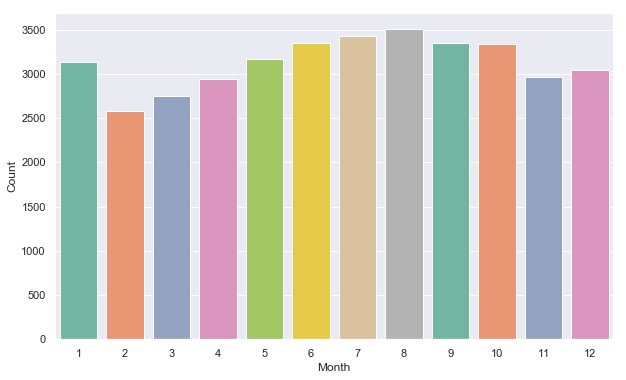

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=month.index, y=month['MONTH'], palette='Set2')
plt.xlabel('Month')
plt.ylabel('Count')

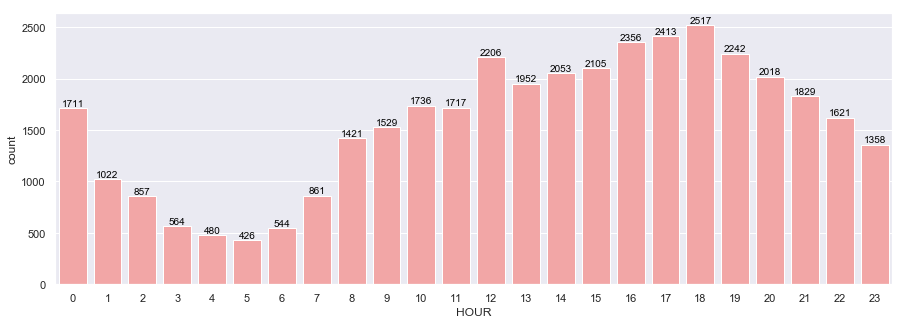

In [46]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2['HOUR'], color='#FF9999')
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')

**Location of Offense**

In [58]:
df2['Lat'].replace(-1, None, inplace=True)
df2['Long'].replace(-1, None, inplace=True)

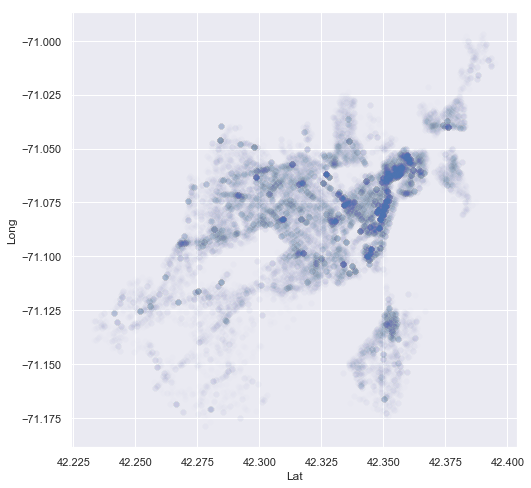

In [61]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df2['Lat'], y=df2['Long'], alpha = 0.01)

Downtown Boston obviously has the darkest points, let's dive into the district.

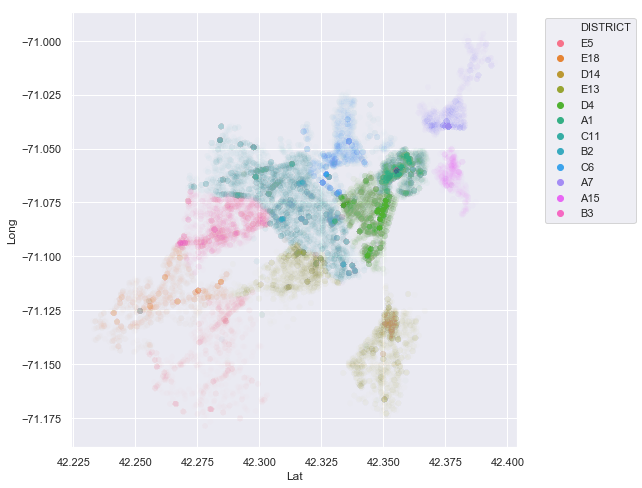

In [68]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df2['Lat'], y=df2['Long'], alpha = 0.01, hue=df2['DISTRICT'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

**Create Folium crime map**

In [74]:
crime_map = folium.Map(location=[42.3150,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

data_heatmap = df2[df2['YEAR'] == 2017]
data_heatmap = df2[['Lat','Long']]
data_heatmap = df2.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

crime_map